In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Capstone Project')

In [0]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/My Drive/Capstone Project/rsna-pneumonia-detection-challenge.zip", 'r')
zip_ref.extractall("/content/drive/My Drive/Capstone Project/All")
zip_ref.close()

In [7]:
class_info = pd.read_csv('/content/drive/My Drive/Capstone Project/All/stage_2_detailed_class_info.csv')
train_labels = pd.read_csv('/content/drive/My Drive/Capstone Project/All/stage_2_train_labels.csv')

df = pd.merge(left = class_info, right = train_labels, how = 'left', on = 'patientId')

##del class_info, train_labels
##print(class_info.tail(2))
##print(train_labels.tail(2))

##Duplicate values --> If yes, lets make it unique
log = len(df[df.duplicated(keep=False)])
print('Is there any duplicate values? -->', log)
df_duplicate = df[df.duplicated(keep=False)]
print('Only Lung Opacity cases exists in duplicate values', df_duplicate[df_duplicate['class'] == 'Lung Opacity'].shape)
print(df_duplicate[df_duplicate['patientId'] == '00436515-870c-4b36-a041-de91049b9ab4'])

##Proceeding with removal of completely repeating rows, Removing duplicates
print('Before duplication removal', df.shape)
df = df.drop_duplicates()
print('After duplication removal', df.shape)

##Checking whether there are any other Target data available otherthan 0, 1
array = ['1', '0']
print('Is there are any other Target data available otherthan 0, 1', df.loc[~df['Target'].isin(array)].shape)
print('___________________________________________________________________________________________________________')
print('Sample patient Id data, after duplicates removal')
df[df['patientId'] == '00436515-870c-4b36-a041-de91049b9ab4']

Is there any duplicate values? --> 14343
Only Lung Opacity cases exists in duplicate values (14343, 7)
                              patientId         class  ...  height  Target
4  00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity  ...   379.0       1
5  00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity  ...   453.0       1
6  00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity  ...   379.0       1
7  00436515-870c-4b36-a041-de91049b9ab4  Lung Opacity  ...   453.0       1

[4 rows x 7 columns]
Before duplication removal (37629, 7)
After duplication removal (30227, 7)
Is there are any other Target data available otherthan 0, 1 (0, 7)
___________________________________________________________________________________________________________
Sample patient Id data, after duplicates removal


,patientId,class,x,y,width,height,Target
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1


In [0]:
## Which means 1 represents Lung Opacity/Pneumonia Patient
## 0 represents normal Patients
df['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

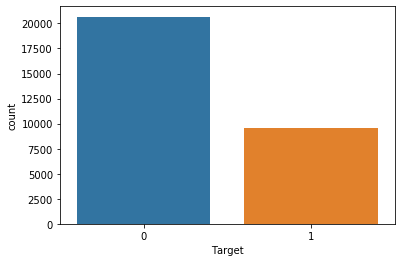

In [0]:
## Count plot
## 1 represents Lung Opacity/Pneumonia Patient
## 0 represents normal Patients
import seaborn as sns
sns.countplot(x="Target", data=df)

In [0]:
## Lets Look for any duplicate values
## We can clearly see a trend here, like patients with only one record are normal 
## Patients with multiple records are not normal
print(df.tail(2)) ## --> This patient itself is having duplicate records, lets check for patient wise duplicates
df['patientId'].value_counts().value_counts()

                                  patientId         class  ...  height  Target
37625  c1f7889a-9ea9-4acb-b64c-b737c929599a  Lung Opacity  ...   345.0       1
37626  c1f7889a-9ea9-4acb-b64c-b737c929599a  Lung Opacity  ...   356.0       1

[2 rows x 7 columns]


1    23286
2     3266
3      119
4       13
Name: patientId, dtype: int64

In [0]:
##Check for class summary(Data representation for pneumonic and normal cases are skewed somewhat, at around 1000 cases variation exists)
df['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

In [8]:
#Lets break this into Normal and Not Normal cases
##df.info()
#df_not_normal.drop(df_not_normal.index,inplace = True)
#df_normal.drop(df_normal.index,inplace = True)

df_not_normal = df[df['class'] != 'Normal']
df_normal = df[df['class'] == 'Normal']

df_not_normal.fillna(0, inplace=True)
df_normal.fillna(0, inplace=True)

print('Not Normal Cases',df_not_normal.shape)
print('Normal Cases',df_normal.shape)
print('Original',df.shape)
df_not_normal.tail(10)

Not Normal Cases (21376, 7)
Normal Cases (8851, 7)
Original (30227, 7)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


,patientId,class,x,y,width,height,Target
37601,c18d1138-ba74-4af5-af21-bdd4d2c96bb5,Lung Opacity,295.0,473.0,133.0,176.0,1
37608,c1cddf32-b957-4753-acaa-472ab1447e86,Lung Opacity,269.0,416.0,193.0,285.0,1
37609,c1cddf32-b957-4753-acaa-472ab1447e86,Lung Opacity,766.0,475.0,135.0,213.0,1
37613,c1e228e4-b7b4-432b-a735-36c48fdb806f,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0
37615,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,Lung Opacity,666.0,418.0,186.0,223.0,1
37616,c1e73a4e-7afe-4ec5-8af6-ce8315d7a2f2,Lung Opacity,316.0,504.0,179.0,273.0,1
37619,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,609.0,464.0,240.0,284.0,1
37620,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity,185.0,298.0,228.0,379.0,1
37625,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1
37626,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,233.0,424.0,201.0,356.0,1


In [0]:
## x,y,width,height all are right skewed
df_not_normal.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patientId,21376,17833,0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,21376,2,No Lung Opacity / Not Normal,11821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,21376,NaN,NaN,NaN,176.138,238.935,0,0,0,280,835
y,21376,NaN,NaN,NaN,163.976,207.802,0,0,0,337,881
width,21376,NaN,NaN,NaN,97.656,115.629,0,0,0,208.25,528
height,21376,NaN,NaN,NaN,147.182,194.742,0,0,0,274,942
Target,21376,NaN,NaN,NaN,0.446997,0.497194,0,0,0,1,1


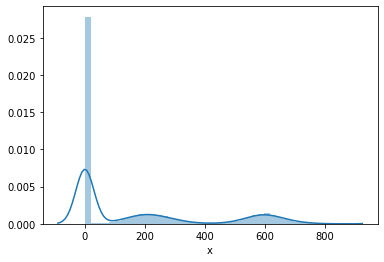

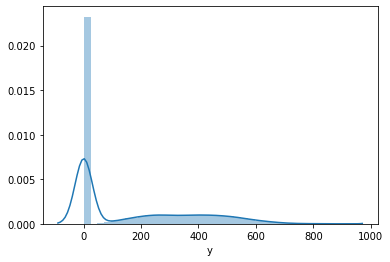

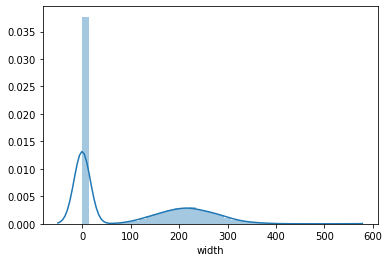

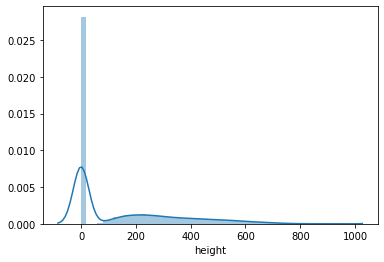

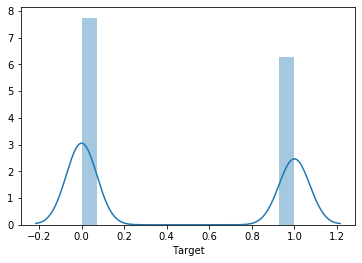

In [9]:
## All the features are Right Skewed
import seaborn as sns 
for i, col in enumerate(df_not_normal):
    if (df_not_normal.columns[i] != 'class') and (df_not_normal.columns[i] != 'patientId'):
        plt.figure(i)
        sns.distplot(df_not_normal[col])

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

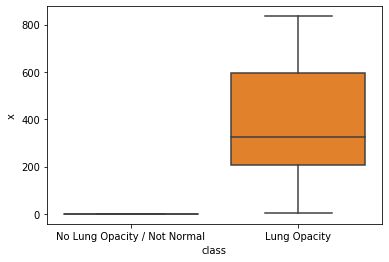

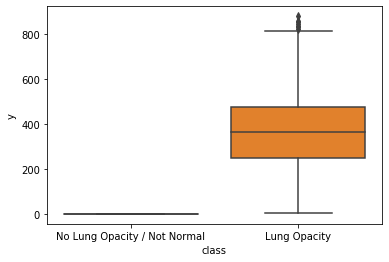

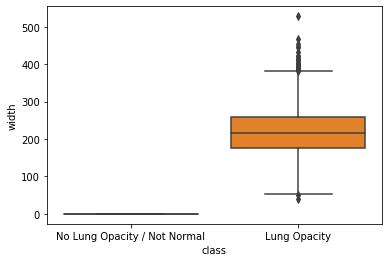

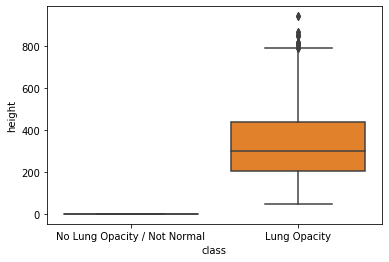

<Figure size 432x288 with 0 Axes>

In [8]:
#Lets create box plot for each column except the target column for each class and look for outliers
'''From the below box plot we can see outliers in most of the cases, especially in y,width,height
If we see from our basic describe command y max --> 881, width max -->528, height max --> 942
Lets just have a check of how many such records exists after 800 for y(from below box plot, is the limit for y)
app 390 for width(upper limit) and app 50(lower limit), height(800 upper limit)'''
for i, col in enumerate(df_not_normal):
    plt.figure(i)
    if (df_not_normal.columns[i] != 'class') and (df_not_normal.columns[i] != 'patientId') and (df_not_normal.columns[i] != 'Target'):
        sns.boxplot(x = 'class', y = df_not_normal[col], data = df_not_normal)

In [10]:
'''From the below box plot we can see outliers in most of the cases, especially in y,width,height
If we see from our basic describe command y max --> 881, width max -->528, height max --> 942
Lets just have a check of how many such records exists after 800 for y(from below box plot, is the limit for y)
app 390 for width(upper limit) and app 50(lower limit), height(800 upper limit)'''

df_lung_op = df_not_normal[df_not_normal['class'] == 'Lung Opacity']
print('Records wherein y is greater than 800 are', len(df_lung_op[df_lung_op['y'] > 800]))
print('Records wherein width is greater than 390 are', len(df_lung_op[df_lung_op['width'] > 390]))
print('Records wherein height is greater than 800 are', len(df_lung_op[df_lung_op['height'] > 800]))

print('_____________________________________________________')
print('The below 4 outliers, in bounding box coordinates[We are going to keep this as it is]:')
##Since width column has many outliers, we are doing an extra analysis on this,
##Even from the box plot we can clearly see one outlier each, above 500 and below 50
print('Records wherein width is greater than 500 are', len(df_lung_op[df_lung_op['width'] > 500]))
print('Records wherein width is lesser than 50 are', len(df_lung_op[df_lung_op['width'] < 50]))

##Height column has many outliers, we can clearly see from box plot that, there is an outlier 
##after 900
print('Records wherein height is greater than 900 are', len(df_lung_op[df_lung_op['height'] > 900]))
print('Patient Ids: 5620c301-4fee-478e-bdb0-124a00010443,097788d4-cb88-4457-8e71-0ca7a3da2216,3ca6661a-ffbd-4d4d-b49b-c96cfd218307,3e62e51c-befb-4a66-b28e-fc469b19e4a8')
print('_____________________________________________________')

Records wherein y is greater than 800 are 11
Records wherein width is greater than 390 are 27
Records wherein height is greater than 800 are 15
_____________________________________________________
The below 4 outliers, in bounding box coordinates[We are going to keep this as it is]:
Records wherein width is greater than 500 are 1
Records wherein width is lesser than 50 are 1
Records wherein height is greater than 900 are 2
Patient Ids: 5620c301-4fee-478e-bdb0-124a00010443,097788d4-cb88-4457-8e71-0ca7a3da2216,3ca6661a-ffbd-4d4d-b49b-c96cfd218307,3e62e51c-befb-4a66-b28e-fc469b19e4a8
_____________________________________________________


In [0]:
##Lets drop these rows and append the same with df dataframe
print('Shape of basic data-->', df.shape)
#df.drop(df.index[df.patientId == '5620c301-4fee-478e-bdb0-124a00010443'],inplace = True)
#df.drop(df.index[df.patientId == '097788d4-cb88-4457-8e71-0ca7a3da2216'],inplace = True)
#df.drop(df.index[df.patientId == '3ca6661a-ffbd-4d4d-b49b-c96cfd218307'],inplace = True)
#df.drop(df.index[df.patientId == '3e62e51c-befb-4a66-b28e-fc469b19e4a8'],inplace = True)
#print('After removal of outliers -->', df.shape)

Shape of basic data--> (30227, 7)


In [0]:
## For Normal dataset, we dont need to have, outlier analysis
## as x y coordinates not there
df_normal.describe().T

,count,mean,std,min,25%,50%,75%,max
x,8851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
y,8851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
width,8851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
height,8851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Target,8851.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


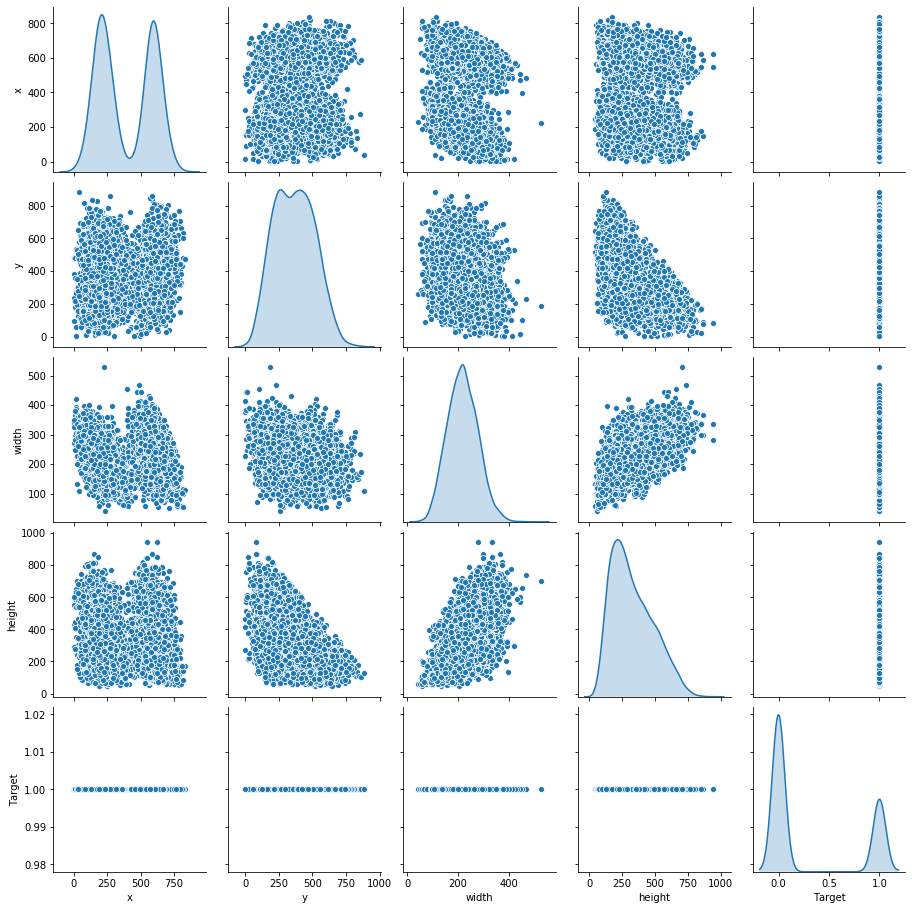

In [11]:
#Check the relationship between variables
'''We could not see linear relatioship between features, but could observe some kind of relationship between
height and width / height and weight, y axis and height'''
import seaborn as sns
sns.pairplot(df.iloc[:,2:8],diag_kind='kde')

In [1]:
!pip install pydicom
import pydicom
dcm_data = pydicom.read_file('/content/drive/My Drive/Capstone Project/All/stage_2_train_images/fffec09e-8a4a-48b1-b33e-ab4890ccd136.dcm')
dcm_data

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.8203.1517874336.95544
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: AP'
(0010, 0010) Patient's Name                      PN: 'fffec09e-8a4a-48b1-b33e-ab4890ccd136'
(0010, 0020) Patient ID                          LO: 'fffec09e-8a4a-48b1-b33e-ab4890ccd136'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's 

In [0]:
df_meta = df
dcm_col = None

for n, pid in enumerate(df_meta['patientId'].unique()):
    dcm_file = '/content/drive/My Drive/Capstone Project/All/stage_2_train_images/%s.dcm' % pid
    dcm = pydicom.read_file(dcm_file)
    
    if not dcm_col:
        dcm_col = dcm.dir()
        dcm_col.remove('PixelSpacing')
        dcm_col.remove('PixelData')
    
    for col in dcm_col:
        if not (col in df_meta.columns):
            df_meta[col] = np.nan
        index = df_meta[df_meta['patientId'] == pid].index
        df_meta.loc[index, col] = dcm.data_element(col).value
        
    del dcm

In [3]:
print('Shape of Meta Data -->', df_meta.shape)
list(df_meta.columns)

Shape of Meta Data --> (30227, 41)


['Unnamed: 0',
 'patientId',
 'class',
 'x',
 'y',
 'width',
 'height',
 'Target',
 'AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelRepresentation',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition']

In [19]:
##Lets take a backup of the dataframe
##del df_meta_bck
##Lets also download this dataframe
df_meta_bck = df_meta.copy()
print(df_meta_bck.shape)

'''from google.colab import files

df_meta_bck.to_csv('meta_data_bck.csv')
files.download('meta_data_bck.csv')'''

(30227, 41)


"from google.colab import files\n\ndf_meta_bck.to_csv('meta_data_bck.csv')\nfiles.download('meta_data_bck.csv')"

In [20]:
##Lets retain only patient related data and lets not go into X-ray/Picture related data
df_meta_bck.drop(['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientBirthDate',
 'PatientID',
 'PhotometricInterpretation',
 'PixelRepresentation',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime'], axis = 1, inplace = True) 
##Again we already have Target column, so lets remove class from the dataframe
print(df_meta_bck.shape)

(30227, 13)


In [21]:
##Lets also remove Patient Name column
df_meta_bck.drop(['PatientName'], axis = 1, inplace = True)
print(df_meta_bck.shape)

(30227, 12)


In [23]:
df_meta_bck.drop(['Unnamed: 0'], axis = 1, inplace = True)
print(df_meta_bck.shape)

(30227, 11)


In [24]:
##print(df_meta_bck[df_meta_bck['PatientOrientation'] != ' '].count())
##Lets convert NAN to zero
df_meta_bck.fillna(0, inplace=True)

##Lets Check the meta data
df_meta_bck.head(10)

,patientId,class,x,y,width,height,Target,PatientAge,PatientOrientation,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0,51,0.0,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0,48,0.0,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0,19,0.0,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0.0,0.0,0.0,0.0,0,28,0.0,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1,32,0.0,F,AP
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,562.0,152.0,256.0,453.0,1,32,0.0,F,AP
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0,54,0.0,M,AP
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,0.0,0.0,0.0,0.0,0,78,0.0,M,PA
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,323.0,577.0,160.0,104.0,1,75,0.0,M,PA
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,695.0,575.0,162.0,137.0,1,75,0.0,M,PA


In [25]:
##Lets check the data representation wrt PatientAge
df_meta_bck['PatientAge'] = pd.to_numeric(df_meta_bck['PatientAge'])
df_meta_bck['PatientAge'].describe()

count    30227.000000
mean        46.797764
std         16.892940
min          1.000000
25%         34.000000
50%         49.000000
75%         59.000000
max        155.000000
Name: PatientAge, dtype: float64

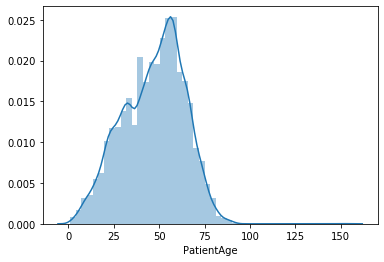

In [26]:
#Could not see any big skewness
sns.distplot(df_meta_bck['PatientAge'])

In [27]:
##Since we are having Target column lets drop class column
df_meta_bck.drop(['class'], axis = 1, inplace = True)
df_meta_bck.head(5)

,patientId,x,y,width,height,Target,PatientAge,PatientOrientation,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,51,0.0,F,PA
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,48,0.0,F,PA
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,19,0.0,M,AP
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,28,0.0,M,PA
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,32,0.0,F,AP


In [28]:
##To check for correlation between features, we need to use pair plot
##But before doing this lets convert Patientsex and view position to numbers
df_meta_bck.PatientSex[df_meta_bck.PatientSex == 'M'] = 1
df_meta_bck.PatientSex[df_meta_bck.PatientSex == 'F'] = 2

df_meta_bck.ViewPosition[df_meta_bck.ViewPosition == 'PA'] = 1
df_meta_bck.ViewPosition[df_meta_bck.ViewPosition == 'AP'] = 2
df_meta_bck.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/

,patientId,x,y,width,height,Target,PatientAge,PatientOrientation,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,51,0.0,2,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,48,0.0,2,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,19,0.0,1,2
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,28,0.0,1,1
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,32,0.0,2,2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


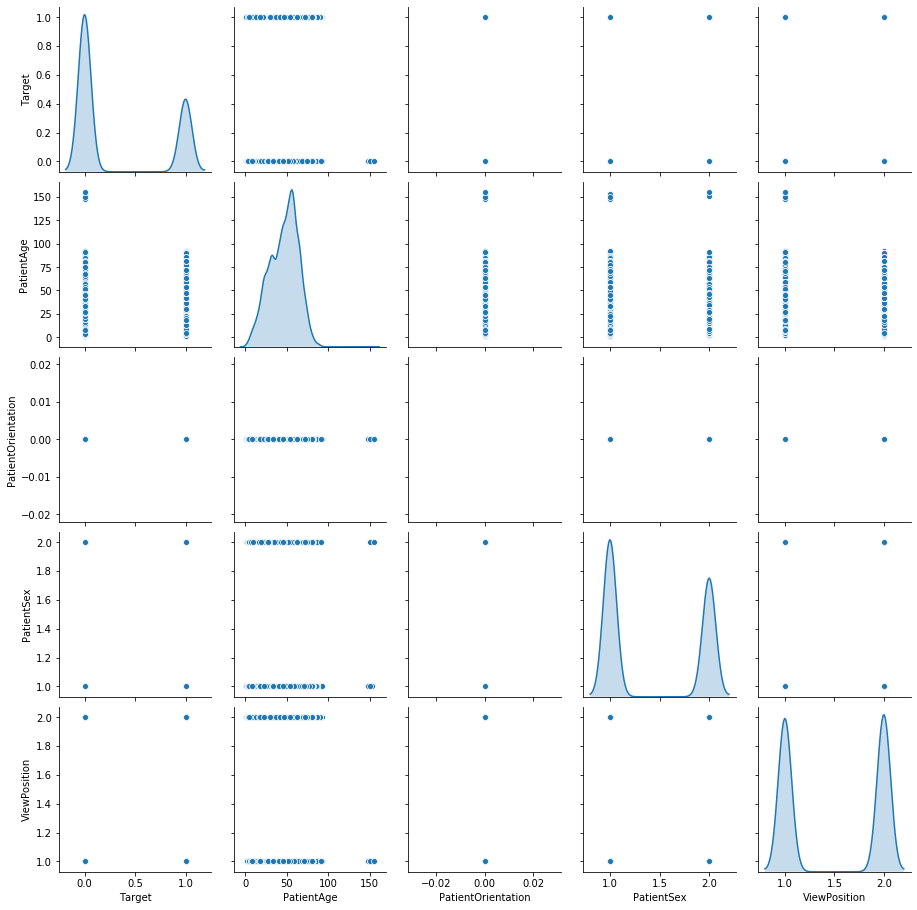

In [29]:
#Check the relationship between variables, only on target PatientAge, PateintOrientation PatientSex ViewPosition
'''We could see clearly outliers in Patients Age, Patient Sex, View Position influencing Target ie whether the person is lung opacity or not
Lets also drop PatientOrientation, which is of no use'''
sns.pairplot(df_meta_bck.iloc[:,5:11],diag_kind='kde')

In [30]:
##Dropping PatientOrientation column which is of no use
df_meta_bck.drop(['PatientOrientation'], axis = 1, inplace = True)
df_meta_bck.head(5)

,patientId,x,y,width,height,Target,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0.0,0.0,0.0,0.0,0,51,2,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0.0,0.0,0.0,0.0,0,48,2,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,0.0,0.0,0.0,0.0,0,19,1,2
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0.0,0.0,0.0,0.0,0,28,1,1
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,32,2,2


In [31]:
##Lets consider only patientId, Target, PatientAge PatientSex, ViewPosition
df_final_chk = df_meta_bck[['patientId','Target','PatientAge','PatientSex','ViewPosition']].copy()
df_final_chk.head(5)

,patientId,Target,PatientAge,PatientSex,ViewPosition
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,51,2,1
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,48,2,1
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,19,1,2
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,28,1,1
4,00436515-870c-4b36-a041-de91049b9ab4,1,32,2,2


In [33]:
#Lets categorize the age groups as below and try to understand, agewise distribution
def age_categories(age):
    if age <= 5:
        return 'Infant'
    if age > 5 and age <= 14:
        return 'Child'
    if age >=15 and age <= 24:
        return 'Youth'
    if age >=25 and age <=64:
        return 'Adult'
    if age >= 65:
        return 'Senior'

# get age categories
df_final_chk['Category'] = df_final_chk['PatientAge'].apply(age_categories)
df_final_chk.head(5)

,patientId,Target,PatientAge,PatientSex,ViewPosition,Category
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,51,2,1,Adult
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,0,48,2,1,Adult
2,00322d4d-1c29-4943-afc9-b6754be640eb,0,19,1,2,Youth
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,0,28,1,1,Adult
4,00436515-870c-4b36-a041-de91049b9ab4,1,32,2,2,Adult


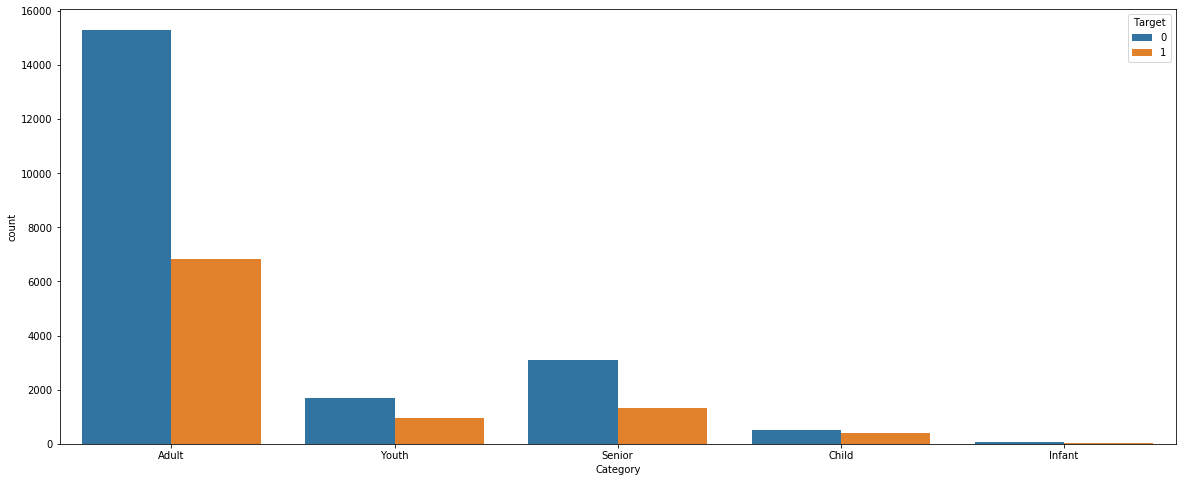

In [35]:
#So we can clearly see that, under the youth category, from 25 to 64 --> Pneumonia cases are very high
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.countplot(x="Category", hue = "Target", data=df_final_chk)
plt.show()

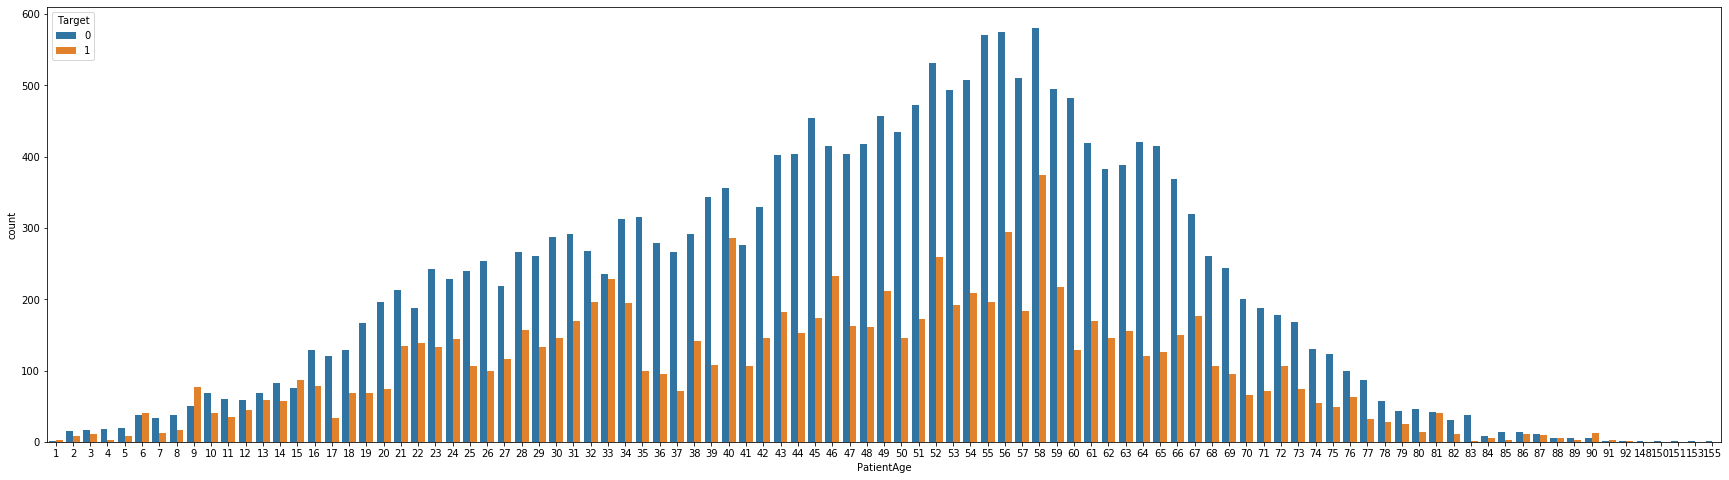

In [0]:
##Count Plot with respect to Target
##From Age group 33 to 59, the pneumonic cases reported are high
##But do we need these 148, 150, 151, 153, 155 age group cases?, i think these are outliers 
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
sns.countplot(x="PatientAge", hue = "Target", data=df_final_chk)
plt.show()

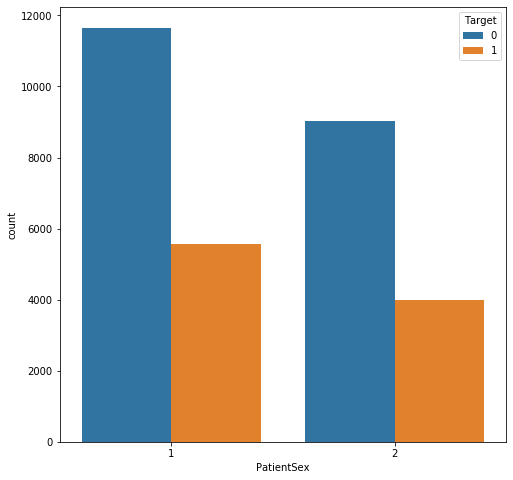

In [0]:
##Count Plot with respect to Target
## Here 1 --> Male, 2 --> Female
## Pneumonic cases in Male are reported high when compared to Female
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.countplot(x="PatientSex", hue = "Target", data=df_final_chk)
plt.show()

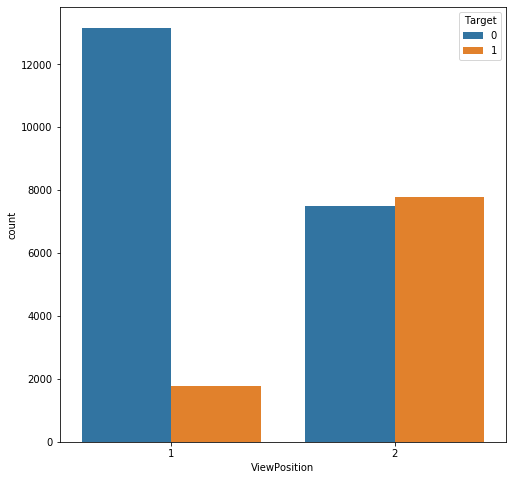

In [0]:
##Count Plot with respect to Target
## Refered website https://www.physio-pedia.com/Chest_X-Rays, which provide fair knowledge about PA/AP
## Here 1 --> PA, 2 --> AP
## Most of the pneumonic cases reported in AP, rather than PA
## eventhough AP is not prefered position 
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.countplot(x="ViewPosition", hue = "Target", data=df_final_chk)
plt.show()

                                  patientId    x  ...  PatientSex  ViewPosition
3921   3b8b8777-a1f6-4384-872a-28b95f59bf0d  0.0  ...           1             1
11032  73aeea88-fc48-4030-8564-0a9d7fdecac4  0.0  ...           2             1
17213  a4e8e96d-93a6-4251-b617-91382e610fab  0.0  ...           1             1
26488  ec3697bd-184e-44ba-9688-ff8d5fbf9bbc  0.0  ...           1             1
27746  f632328d-5819-4b29-b54f-adf4934bbee6  0.0  ...           2             1

[5 rows x 9 columns]


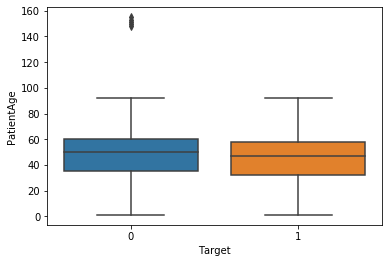

In [36]:
##Lets remove the Age outliers
print(df_meta_bck[df_meta_bck["PatientAge"] >= 148])
sns.boxplot(x = 'Target', y = df_meta_bck['PatientAge'], data = df_meta_bck)

In [37]:
#The below is nothing but persons above 147 age and these data seems to be outliers
#So, 5 records in basic data can be removed
print(df[df["patientId"] == '3b8b8777-a1f6-4384-872a-28b95f59bf0d'])
print(df[df["patientId"] == '73aeea88-fc48-4030-8564-0a9d7fdecac4'])
print(df[df["patientId"] == 'a4e8e96d-93a6-4251-b617-91382e610fab'])
print(df[df["patientId"] == 'ec3697bd-184e-44ba-9688-ff8d5fbf9bbc'])
print(df[df["patientId"] == 'f632328d-5819-4b29-b54f-adf4934bbee6'])

                                 patientId   class   x  ...  width  height  Target
5525  3b8b8777-a1f6-4384-872a-28b95f59bf0d  Normal NaN  ...    NaN     NaN       0

[1 rows x 7 columns]
                                  patientId  ... Target
13818  73aeea88-fc48-4030-8564-0a9d7fdecac4  ...      0

[1 rows x 7 columns]
                                  patientId  ... Target
21301  a4e8e96d-93a6-4251-b617-91382e610fab  ...      0

[1 rows x 7 columns]
                                  patientId   class   x  ...  width  height  Target
32970  ec3697bd-184e-44ba-9688-ff8d5fbf9bbc  Normal NaN  ...    NaN     NaN       0

[1 rows x 7 columns]
                                  patientId   class   x  ...  width  height  Target
34436  f632328d-5819-4b29-b54f-adf4934bbee6  Normal NaN  ...    NaN     NaN       0

[1 rows x 7 columns]


In [38]:
##Lets remove these outliers both in meta data and from basic data
print('Before outlier removal(Meta Data) -->', df_meta_bck.shape)
df_meta_bck.drop(df_meta_bck.index[df_meta_bck.PatientAge >= 148],inplace = True)
print('After outlier removal(Meta Data) -->', df_meta_bck.shape)
print('_____________________________________________________________________________')
##Lets drop these rows and append the same with df dataframe
print('Before removal of outliers(Basic Data) -->', df.shape)
df.drop(df.index[df.patientId == '3b8b8777-a1f6-4384-872a-28b95f59bf0d'],inplace = True)
df.drop(df.index[df.patientId == '73aeea88-fc48-4030-8564-0a9d7fdecac4'],inplace = True)
df.drop(df.index[df.patientId == 'a4e8e96d-93a6-4251-b617-91382e610fab'],inplace = True)
df.drop(df.index[df.patientId == 'ec3697bd-184e-44ba-9688-ff8d5fbf9bbc'],inplace = True)
df.drop(df.index[df.patientId == 'f632328d-5819-4b29-b54f-adf4934bbee6'],inplace = True)
print('After removal of outliers(Basic Data) -->', df.shape)

Before outlier removal(Meta Data) --> (30227, 9)
After outlier removal(Meta Data) --> (30222, 9)
_____________________________________________________________________________
Before removal of outliers(Basic Data) --> (30227, 7)
After removal of outliers(Basic Data) --> (30222, 7)


In [39]:
print('Meta Data', df_meta_bck['Target'].value_counts())
print('_________________________________________________________')
print('Basic Data', df['Target'].value_counts())

Meta Data 0    20667
1     9555
Name: Target, dtype: int64
_________________________________________________________
Basic Data 0    20667
1     9555
Name: Target, dtype: int64


In [0]:
#We did the following EDA analysis:
#1. Skewness Check on basic data
#2. Outliers on basic data (By splitting a dataframe into 2, Normal cases and Pneumonic cases)
#3. Correlation between features
#4. Took dcm data along with basic data, kept only those features which are related to the patients
#5. Checked for correlations, between these features
#6. Checked for cases pertaining to AP and PA
#7. Categorized this data agewise and analyzed in which age group pneumonia reported high
#8. Checked for age wise outliers and removed these patients

#Conclusion:
#1. From Meta data 'PatientAge', 'PatientSex', 'ViewPosition' features can be useful in predicting the Target
#2. Could not get information wrt bounding box Coordinates
#3. There is some skewness between lung opacity cases and true Normal cases[If we exclude 'No Lung Opacity/Normal cases']
#4. 5 rows (5 patients) have been dropped as obvious outliers.